In [3]:
from pathlib import Path
import pandas as pd

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
base_path = r"D:\document\code\paper\World-of-Six/results/results_qwen_max"
excel_results = base_path + r"/results_excel"
figure_results = base_path + r"/results_figures"
eg_excel_results_sequence_price = excel_results + r"/beta_025/no_guidance/sequence_price.xlsx"
eg_excel_results_same_price = excel_results + r"/beta_025/no_guidance/same_price_0.xlsx"
eg_excel_results_no_history = excel_results + r"/beta_025/no_history_no_guidance/price_0.xlsx"

In [5]:
eg_excel_results_sequence_price

'D:\\document\\code\\paper\\World-of-Six/results/results_qwen_max/results_excel/beta_025/no_guidance/sequence_price.xlsx'

In [16]:
class FigureGenerator:
    def __init__(self, excel_results_path, figures_results_path):
        self.excel_results_dir = Path(excel_results_path)
        self.figures_results_dir = Path(figures_results_path)
        # self.figures_results_dir.relative_to(excel_results_path)

    def process_dir(self):
        ...

    def iter_results(self):
        for beta_dir in self.excel_results_dir.iterdir():
            # 获取当前beta的情况
            beta_name = beta_dir.name
            # 获取路径
            excel_no_history_no_guidance_dir = self.excel_results_dir / beta_name / "no_history_no_guidance"
            excel_no_guidance_dir = self.excel_results_dir / beta_name / "no_guidance"
            figures_no_history_no_guidance_dir = self.figures_results_dir / beta_name / "no_history_no_guidance"
            figures_no_guidance_dir = self.figures_results_dir / beta_name / "no_guidance"
            # 创建路径
            figures_no_history_no_guidance_dir.mkdir(exist_ok=True, parents=True)
            figures_no_guidance_dir.mkdir(exist_ok=True, parents=True)
            # 分别处理结果
            self.handle_no_history_results(excel_no_history_no_guidance_dir)
            self.handle_no_guidance_results(excel_no_guidance_dir)

    def handle_no_guidance_results(self, excel_no_guidance_dir):
        sequence_price_df_path = excel_no_guidance_dir / 'sequence_price.xlsx'
        reverse_price_df_path = excel_no_guidance_dir / 'reverse_price.xlsx'
        random_price_df_path = excel_no_guidance_dir / 'random_price.xlsx'
        same_price_dfs_path = [
            excel_no_guidance_dir / f'same_price_{i}.xlsx'
            for i in range(6)
        ]
        self.generate_prices_list_figures(sequence_price_df_path)
        self.generate_prices_list_figures(reverse_price_df_path)
        self.generate_prices_list_figures(random_price_df_path)
        [
            self.generate_same_price_figures(same_price_dfs_path[price_index])
            for price_index in range(6)
        ]

    def handle_no_history_results(self, no_history_dir):
        beta_name = no_history_dir.parent.name
        path_to_save = self.figures_results_dir / beta_name / 'no_history_no_guidance' / 'no_history_no_guidance.png'
        price_dfs = [
            pd.read_excel(no_history_dir / f'price_{i}.xlsx')
            for i in range(6)
        ]
        self.generate_no_history_figures(price_dfs, beta_name, path_to_save,)

    def generate_prices_list_figures(self, df_path: Path):
        df_name = df_path.stem
        experiment_method_name = df_path.parent.stem
        beta_name = df_path.parent.parent.stem
        path_to_save = self.figures_results_dir / beta_name / experiment_method_name / f"{df_name}.png"
        df = pd.read_excel(df_path)
        df = self.process_df(df, beta_name)
        # 设置图像风格
        sns.set(style="whitegrid")
        fig, ax = plt.subplots(figsize=(10, 6))
        sns.boxplot(
            ax=ax,
            data=df, x='t_price', y='expectation',
            color='lightblue', width=0.5,
            fliersize=0.3
        )
        sns.lineplot(
            ax=ax,
            data=df, x='t_price', y='group_mean',
            label='mean of experiment results',
        )
        sns.lineplot(
            ax=ax,
            data=df, x='t_price', y='theoretical_solution',
            marker='o', linestyle='--', color='red',
            label='theoretical solution under FEE',
        )

        plt.ylim(-0.5, 6.5)
        ax.set_xlabel("price")
        ax.set_ylabel("expected number of buyers")
        plt.legend(loc='lower left')
        plt.savefig(path_to_save, dpi=300)

    def generate_same_price_figures(self, df_path: Path):
        price_index = df_path.stem[-1]
        experiment_method_name = df_path.parent.name
        beta_name = df_path.parent.parent.stem
        path_to_save = self.figures_results_dir / beta_name / experiment_method_name / f"same_price_{price_index}.png"
        df = pd.read_excel(df_path)
        df = self.process_df(df, beta_name)
        # 设置图像风格
        sns.set(style="whitegrid")
        # 绘制箱线图
        plt.figure(figsize=(10, 6))
        sns.boxplot(x='game_round', y='expectation', data=df, showmeans=True,
                    meanprops={"marker": "o", "markerfacecolor": "red", "markeredgecolor": "black"})
        # 添加标题和标签
        plt.title(f'same_price_{price_index}')
        plt.xlabel("round")
        plt.ylabel("expectation")
        plt.savefig(path_to_save, dpi=300)

    def generate_no_history_figures(self, df_list, beta_name,  path_to_save):
        df = pd.concat(df_list, ignore_index=True)
        df = self.process_df(df, beta_name)
        # 设置图像风格
        sns.set(style="whitegrid")
        # 绘制箱线图
        fig, ax = plt.subplots(figsize=(10, 6))
        sns.boxplot(
            ax=ax,
            data=df, x='t_price', y='expectation',
            color='lightblue', width=0.5,
            fliersize=0.3
        )
        sns.lineplot(
            ax=ax,
            data=df, x='t_price', y='group_mean',
            label='mean of experiment results',
        )
        sns.lineplot(
            ax=ax,
            data=df, x='t_price', y='theoretical_solution',
            marker='o', linestyle='--', color='red',
            label='theoretical solution under FEE',
        )

        plt.ylim(-0.5, 6.5)
        ax.set_xlabel("price")
        ax.set_ylabel("expected number of buyers")
        plt.legend(loc='lower left')
        plt.savefig(path_to_save, dpi=300)

    def process_df(self, df, beta_name):
        theoretical_solution_map = None
        if beta_name == 'beta_025':
            theoretical_solution_map = {
                2.24: 6, 2.99: 5, 3.74: 4, 4.49: 3, 5.24: 2, 5.99: 1,
            }
        elif beta_name == 'beta_075':
            theoretical_solution_map = {
                4.74: 6, 4.99: 5, 5.24: 4, 5.49: 3, 5.74: 2, 5.99: 1,
            }
        df['theoretical_solution'] = df['price'].map(theoretical_solution_map)
        df['group_mean'] = df.groupby('price')['expectation'].transform('mean')
        df['t_price'] = df['price'].astype(str)
        return df

    def save_plot(self, path_to_save):
        plt.savefig(path_to_save)

In [17]:
figure_generator = FigureGenerator(
    excel_results, figure_results
)

(-0.5, 6.5)

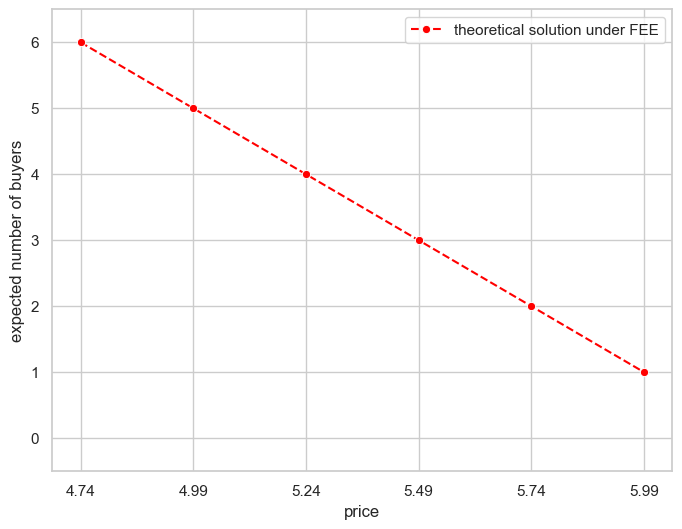

In [6]:
sns.set(style="whitegrid")
        # 绘制箱线图
fig, ax = plt.subplots(figsize=(8, 6))
# theoretical_solution = {
#     'price': ['2.24', '2.99', '3.74', '4.49', '5.24', '5.99'],
#     'expectation': [6, 5, 4, 3, 2, 1],
# }
theoretical_solution = {
    'price': ['4.74', '4.99', '5.24', '5.49', '5.74', '5.99'],
    'expectation': [6, 5, 4, 3, 2, 1],
}
sns.lineplot(
x='price', y='expectation', data=theoretical_solution, 
    marker='o'
, linestyle='--', color='red',
            label='theoretical solution under FEE',)
plt.ylabel("expected number of buyers")
plt.ylim(-0.5, 6.5)

In [5]:
df = pd.read_excel(eg_excel_results_sequence_price)
df

,game_round,participant_id,content,expectation,reason,standalone_value,network_effect,price,expectation_payoff,is_participate,real_participant_number,real_payoff,game_index
0,1,Participant1,首先，我们需要基于给定的信息来分析每个人是否可能参加这次会议。我们知道独立收益（standa...,6,基于对不同参与人数下各人效用的分析，当所有人都预期有6人参与时，这种预期可以自我实现，即每个...,1,0.25,2.24,0.26,True,6,0.26,0
1,1,Participant2,为了决定是否参加这场会议，我需要计算我的效用。根据给定的信息，我们知道每个人的独立收益（st...,3,基于独立价值分布以及网络效应的影响，预估约半数人会选择参加。同时考虑到自身情况，若预期至少三...,2,0.25,2.24,0.51,True,6,1.26,0
2,1,Participant3,为了决定是否参加这次会议，我们需要先估计预期的参与人数。根据给出的信息，我们知道每个人的独立...,3,考虑到所有参与者的独立价值分布及网络效应的影响，预计约半数的人会参加，这样既能保证一定的社交...,3,0.25,2.24,1.51,True,6,2.26,0
3,1,Participant4,为了决定是否参加这次会议，我需要计算自己的效用。首先，我们需要估计预期的参与人数（`part...,3,基于每个人的独立收益和网络效应，我预计至少有3个人会参加（收益为6、5和4的人）。考虑到我的...,4,0.25,2.24,2.51,True,6,3.26,0
4,1,Participant5,为了决定是否参加这场会议，我需要先基于给定的信息推测出可能参与的人数。这涉及到对其他玩家行为...,4,基于网络效应的影响及参与者们对较高独立收益者的积极预期，预估将有4名参与者加入会议。,5,0.25,2.24,3.76,True,6,4.26,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,6,Participant2,在上一轮中，实际参与的人数为2人，你实际获取的效用是0.0。基于这个信息，我们可以重新评估和...,4,通过上一轮的实际参与人数和实际效用，我们反推出基础费用为2.50。基于这个费用，当预期参与人...,2,0.25,5.99,-2.99,False,1,0.00,9
356,6,Participant3,在上一轮中，实际参与的人数为2人，我实际获取的效用是0.0。现在我们可以使用这个信息来重新计...,4,基于已知的基础费用3.5，独立价值1和2的人需要预期参与人数超过10人和6人才会参加，这在只...,3,0.25,5.99,-1.99,False,1,0.00,9
357,6,Participant4,在上一轮中，实际参与的人数为2人，我实际获取的效用是0.0。这可以帮助我们进一步调整我们的预...,2,基于上一轮的实际参与人数和效用计算，以及当前的基础费用，预期大约有2人会参加。这样可以确保个...,4,0.25,5.99,-1.49,False,1,0.00,9
358,6,Participant5,在上一轮中，实际参与的人数为2人，我实际获取的效用是0.26（近似值）。这说明我的预期（3人...,2,根据上一轮的实际结果和计算出的基础费用（5.24），只有standalone_value为1...,5,0.25,5.99,-0.49,False,1,0.00,9


In [6]:
df['theoretical_solution'] = df['price'].map({
    2.24: 6, 2.99: 5, 3.74: 4, 4.49: 3, 5.24: 2, 5.99: 1
})
df

,game_round,participant_id,content,expectation,reason,standalone_value,network_effect,price,expectation_payoff,is_participate,real_participant_number,real_payoff,game_index,theoretical_solution
0,1,Participant1,首先，我们需要基于给定的信息来分析每个人是否可能参加这次会议。我们知道独立收益（standa...,6,基于对不同参与人数下各人效用的分析，当所有人都预期有6人参与时，这种预期可以自我实现，即每个...,1,0.25,2.24,0.26,True,6,0.26,0,6
1,1,Participant2,为了决定是否参加这场会议，我需要计算我的效用。根据给定的信息，我们知道每个人的独立收益（st...,3,基于独立价值分布以及网络效应的影响，预估约半数人会选择参加。同时考虑到自身情况，若预期至少三...,2,0.25,2.24,0.51,True,6,1.26,0,6
2,1,Participant3,为了决定是否参加这次会议，我们需要先估计预期的参与人数。根据给出的信息，我们知道每个人的独立...,3,考虑到所有参与者的独立价值分布及网络效应的影响，预计约半数的人会参加，这样既能保证一定的社交...,3,0.25,2.24,1.51,True,6,2.26,0,6
3,1,Participant4,为了决定是否参加这次会议，我需要计算自己的效用。首先，我们需要估计预期的参与人数（`part...,3,基于每个人的独立收益和网络效应，我预计至少有3个人会参加（收益为6、5和4的人）。考虑到我的...,4,0.25,2.24,2.51,True,6,3.26,0,6
4,1,Participant5,为了决定是否参加这场会议，我需要先基于给定的信息推测出可能参与的人数。这涉及到对其他玩家行为...,4,基于网络效应的影响及参与者们对较高独立收益者的积极预期，预估将有4名参与者加入会议。,5,0.25,2.24,3.76,True,6,4.26,0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,6,Participant2,在上一轮中，实际参与的人数为2人，你实际获取的效用是0.0。基于这个信息，我们可以重新评估和...,4,通过上一轮的实际参与人数和实际效用，我们反推出基础费用为2.50。基于这个费用，当预期参与人...,2,0.25,5.99,-2.99,False,1,0.00,9,1
356,6,Participant3,在上一轮中，实际参与的人数为2人，我实际获取的效用是0.0。现在我们可以使用这个信息来重新计...,4,基于已知的基础费用3.5，独立价值1和2的人需要预期参与人数超过10人和6人才会参加，这在只...,3,0.25,5.99,-1.99,False,1,0.00,9,1
357,6,Participant4,在上一轮中，实际参与的人数为2人，我实际获取的效用是0.0。这可以帮助我们进一步调整我们的预...,2,基于上一轮的实际参与人数和效用计算，以及当前的基础费用，预期大约有2人会参加。这样可以确保个...,4,0.25,5.99,-1.49,False,1,0.00,9,1
358,6,Participant5,在上一轮中，实际参与的人数为2人，我实际获取的效用是0.26（近似值）。这说明我的预期（3人...,2,根据上一轮的实际结果和计算出的基础费用（5.24），只有standalone_value为1...,5,0.25,5.99,-0.49,False,1,0.00,9,1


In [43]:
df['group_mean'] = df.groupby('price')['expectation'].transform('mean')

In [44]:
df

,game_round,participant_id,content,expectation,reason,standalone_value,network_effect,price,expectation_payoff,is_participate,real_participant_number,real_payoff,game_index,theoretical_solution,t_price,group_mean
0,1,Participant1,首先，我们需要基于给定的信息来分析每个人是否可能参加这次会议。我们知道独立收益（standa...,6,基于对不同参与人数下各人效用的分析，当所有人都预期有6人参与时，这种预期可以自我实现，即每个...,1,0.25,2.24,0.26,True,6,0.26,0,6,2.24,4.400000
1,1,Participant2,为了决定是否参加这场会议，我需要计算我的效用。根据给定的信息，我们知道每个人的独立收益（st...,3,基于独立价值分布以及网络效应的影响，预估约半数人会选择参加。同时考虑到自身情况，若预期至少三...,2,0.25,2.24,0.51,True,6,1.26,0,6,2.24,4.400000
2,1,Participant3,为了决定是否参加这次会议，我们需要先估计预期的参与人数。根据给出的信息，我们知道每个人的独立...,3,考虑到所有参与者的独立价值分布及网络效应的影响，预计约半数的人会参加，这样既能保证一定的社交...,3,0.25,2.24,1.51,True,6,2.26,0,6,2.24,4.400000
3,1,Participant4,为了决定是否参加这次会议，我需要计算自己的效用。首先，我们需要估计预期的参与人数（`part...,3,基于每个人的独立收益和网络效应，我预计至少有3个人会参加（收益为6、5和4的人）。考虑到我的...,4,0.25,2.24,2.51,True,6,3.26,0,6,2.24,4.400000
4,1,Participant5,为了决定是否参加这场会议，我需要先基于给定的信息推测出可能参与的人数。这涉及到对其他玩家行为...,4,基于网络效应的影响及参与者们对较高独立收益者的积极预期，预估将有4名参与者加入会议。,5,0.25,2.24,3.76,True,6,4.26,0,6,2.24,4.400000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,6,Participant2,在上一轮中，实际参与的人数为2人，你实际获取的效用是0.0。基于这个信息，我们可以重新评估和...,4,通过上一轮的实际参与人数和实际效用，我们反推出基础费用为2.50。基于这个费用，当预期参与人...,2,0.25,5.99,-2.99,False,1,0.00,9,1,5.99,2.383333
356,6,Participant3,在上一轮中，实际参与的人数为2人，我实际获取的效用是0.0。现在我们可以使用这个信息来重新计...,4,基于已知的基础费用3.5，独立价值1和2的人需要预期参与人数超过10人和6人才会参加，这在只...,3,0.25,5.99,-1.99,False,1,0.00,9,1,5.99,2.383333
357,6,Participant4,在上一轮中，实际参与的人数为2人，我实际获取的效用是0.0。这可以帮助我们进一步调整我们的预...,2,基于上一轮的实际参与人数和效用计算，以及当前的基础费用，预期大约有2人会参加。这样可以确保个...,4,0.25,5.99,-1.49,False,1,0.00,9,1,5.99,2.383333
358,6,Participant5,在上一轮中，实际参与的人数为2人，我实际获取的效用是0.26（近似值）。这说明我的预期（3人...,2,根据上一轮的实际结果和计算出的基础费用（5.24），只有standalone_value为1...,5,0.25,5.99,-0.49,False,1,0.00,9,1,5.99,2.383333


In [35]:
df['t_price'] = df['price'].astype(str)

In [36]:
df

,game_round,participant_id,content,expectation,reason,standalone_value,network_effect,price,expectation_payoff,is_participate,real_participant_number,real_payoff,game_index,theoretical_solution,t_price
0,1,Participant1,首先，我们需要基于给定的信息来分析每个人是否可能参加这次会议。我们知道独立收益（standa...,6,基于对不同参与人数下各人效用的分析，当所有人都预期有6人参与时，这种预期可以自我实现，即每个...,1,0.25,2.24,0.26,True,6,0.26,0,6,2.24
1,1,Participant2,为了决定是否参加这场会议，我需要计算我的效用。根据给定的信息，我们知道每个人的独立收益（st...,3,基于独立价值分布以及网络效应的影响，预估约半数人会选择参加。同时考虑到自身情况，若预期至少三...,2,0.25,2.24,0.51,True,6,1.26,0,6,2.24
2,1,Participant3,为了决定是否参加这次会议，我们需要先估计预期的参与人数。根据给出的信息，我们知道每个人的独立...,3,考虑到所有参与者的独立价值分布及网络效应的影响，预计约半数的人会参加，这样既能保证一定的社交...,3,0.25,2.24,1.51,True,6,2.26,0,6,2.24
3,1,Participant4,为了决定是否参加这次会议，我需要计算自己的效用。首先，我们需要估计预期的参与人数（`part...,3,基于每个人的独立收益和网络效应，我预计至少有3个人会参加（收益为6、5和4的人）。考虑到我的...,4,0.25,2.24,2.51,True,6,3.26,0,6,2.24
4,1,Participant5,为了决定是否参加这场会议，我需要先基于给定的信息推测出可能参与的人数。这涉及到对其他玩家行为...,4,基于网络效应的影响及参与者们对较高独立收益者的积极预期，预估将有4名参与者加入会议。,5,0.25,2.24,3.76,True,6,4.26,0,6,2.24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,6,Participant2,在上一轮中，实际参与的人数为2人，你实际获取的效用是0.0。基于这个信息，我们可以重新评估和...,4,通过上一轮的实际参与人数和实际效用，我们反推出基础费用为2.50。基于这个费用，当预期参与人...,2,0.25,5.99,-2.99,False,1,0.00,9,1,5.99
356,6,Participant3,在上一轮中，实际参与的人数为2人，我实际获取的效用是0.0。现在我们可以使用这个信息来重新计...,4,基于已知的基础费用3.5，独立价值1和2的人需要预期参与人数超过10人和6人才会参加，这在只...,3,0.25,5.99,-1.99,False,1,0.00,9,1,5.99
357,6,Participant4,在上一轮中，实际参与的人数为2人，我实际获取的效用是0.0。这可以帮助我们进一步调整我们的预...,2,基于上一轮的实际参与人数和效用计算，以及当前的基础费用，预期大约有2人会参加。这样可以确保个...,4,0.25,5.99,-1.49,False,1,0.00,9,1,5.99
358,6,Participant5,在上一轮中，实际参与的人数为2人，我实际获取的效用是0.26（近似值）。这说明我的预期（3人...,2,根据上一轮的实际结果和计算出的基础费用（5.24），只有standalone_value为1...,5,0.25,5.99,-0.49,False,1,0.00,9,1,5.99


<Figure size 640x480 with 0 Axes>

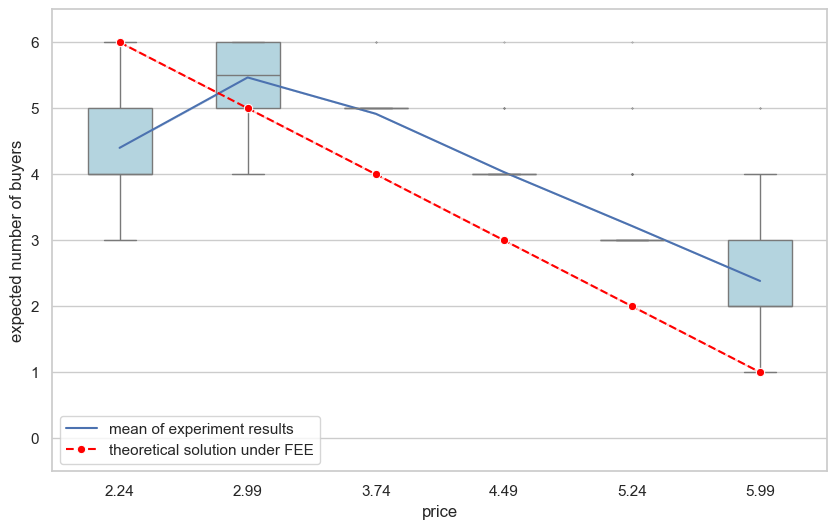

In [74]:
plt.clf()
sns.set(style="whitegrid")
# sns.set_palette("muted")
# 创建画布和坐标轴
fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(
    x='t_price', 
    y='expectation', 
    data=df, 
    ax=ax, 
    # showmeans=True, 
    color='lightblue',
    # meanprops={"marker": "o", "markerfacecolor": "red", "markeredgecolor": "black"},
    # order=theoretical_solution['price']  # 按理论解的 price 顺序排列箱线图的分组
    width=0.5,
    # showfliers=False
    fliersize=0.3
)
sns.lineplot(
    x='t_price', 
    y='group_mean',
    data=df, 
    ax=ax, 
    label='mean of experiment results',
    # legend=True,
    # marker='o', 
    # color='green'  # 设置折线图的颜色，避免与箱线图混淆
)
# 绘制理论解的折线图
sns.lineplot(
    x='t_price', 
    y='theoretical_solution',
    data=df, 
    ax=ax, 
    marker='o',
    linestyle='--',
    color='red',
    label='theoretical solution under FEE',
    # legend=True,
    # color='green'  # 设置折线图的颜色，避免与箱线图混淆
)


# plt.scatter(x=range(len(means)), y=[6, 5, 4, 3, 2, 1], color='red', zorder=10)
# plt.plot(range(len(means)), [6, 5, 4, 3, 2, 1], color='blue', linestyle='-', zorder=5)
# plt.scatter(x=range(len(means)), y=means.values, color='red', zorder=10)
# plt.plot(range(len(means)), means.values, color='blue', linestyle='-', zorder=5)

# 设置 y 轴范围
plt.ylim(-0.5, 6.5)

# 添加标题和标签
ax.set_xlabel("price")
ax.set_ylabel("expected number of buyers")
plt.legend(loc='lower left')
# 调整布局并显示
# plt.tight_layout()
# plt.show()

In [80]:
df_same_price = pd.read_excel(eg_excel_results_same_price)
df_same_price

,game_round,participant_id,content,expectation,reason,standalone_value,network_effect,price,expectation_payoff,is_participate,real_participant_number,real_payoff,game_index
0,1,Participant1,为了做出合理的预期，我们首先需要理解每个参与者基于他们各自的`standalone_valu...,4,考虑到所有参与者的独立收益分布及正向的网络效应，预计大部分人都会选择参加以最大化个人效用。同...,1,0.25,2.24,-0.24,False,5,0.00,0
1,1,Participant2,首先，让我们理解一下给定的信息和如何根据这些信息进行推理。\n\n- 你（Participa...,4,基于独立价值分布及网络效应的影响，预计约4至5人会参加。作为独立价值为2的参与者，在这种情况...,2,0.25,2.24,0.76,True,5,1.01,0
2,1,Participant3,首先，我们需要理解每个人在决定是否参加会议时的考虑。根据效用公式：\n\n\[ \text{...,4,基于独立收益和网络效应的考量，预计大部分人都能找到足够的理由参与，特别是当参与人数达到一定程...,3,0.25,2.24,1.76,True,5,2.01,0
3,1,Participant4,为了做出合理的预期，我们需要考虑每个人基于效用计算公式所可能做出的选择。首先，我们先明确一下...,5,基于网络效应和个人独立价值之间的权衡，预计大部分人都能找到足够的理由参加。特别是当参与人数增...,4,0.25,2.24,3.01,True,5,3.01,0
4,1,Participant5,为了做出合理的预期，我们需要考虑每个参与者基于他们的独立收益（standalone_valu...,4,基于独立收益与网络效应之间的平衡点估计，预期约一半至多数参与者会加入。由于我的独立收益较高，...,5,0.25,2.24,3.76,True,5,4.01,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,6,Participant2,在上一轮中，实际参与的人数为6人，你实际获取的效用是1.26。这说明你的预期和实际情况一致，...,6,根据上一轮的实际参与人数和效用，可以推断出基础费用为2.24。在这个价格下，所有人的效用都将...,2,0.25,2.24,1.26,True,6,1.26,9
356,6,Participant3,在上一轮中，实际参与的人数为6人，我的实际效用是2.26。基于这些信息，我们可以重新评估和调...,6,根据上一轮的实际参与人数和计算出的基础费用，所有参与者的效用都大于0，因此预计所有6人都会选...,3,0.25,2.24,2.26,True,6,2.26,9
357,6,Participant4,在上一轮中，实际参与的人数为6人，我实际获取的效用是3.26。根据这些信息，我们可以确认基础...,6,基于上一轮的实际参与人数和我的实际效用，计算出基础费用为2.24。通过计算每个人的效用，发现...,4,0.25,2.24,3.26,True,6,3.26,9
358,6,Participant5,在上一轮中，实际参与的人数为6人，我的实际效用是4.26。根据这个信息，我们可以反推出基础费...,6,基于上一轮所有6人都参与的事实，以及当前的网络效应和基础费用，预计这一轮也会有较高的参与率。...,5,0.25,2.24,4.26,True,6,4.26,9


In [86]:
df_same_price['group_mean'] = df_same_price.groupby('game_round')['expectation'].transform('mean')

In [84]:
df_same_price['t_game_round'] = df_same_price['game_round'].astype(str)

<Figure size 1000x600 with 0 Axes>

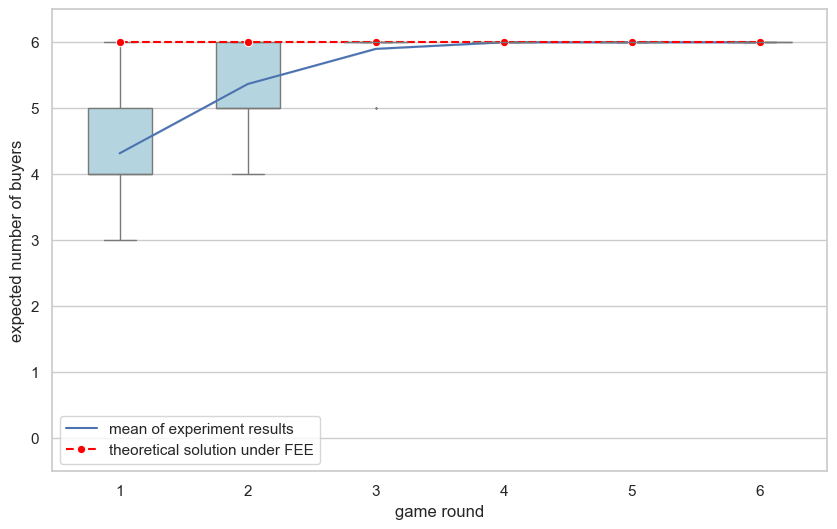

In [92]:
# 设置图像风格
sns.set(style="whitegrid")

# 绘制箱线图
plt.figure(figsize=(10, 6))
fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(
    x='t_game_round', 
    y='expectation', 
    data=df_same_price, 
    ax=ax, 
    # showmeans=True, 
    color='lightblue',
    # meanprops={"marker": "o", "markerfacecolor": "red", "markeredgecolor": "black"},
    # order=theoretical_solution['price']  # 按理论解的 price 顺序排列箱线图的分组
    width=0.5,
    # showfliers=False
    fliersize=0.3
)
sns.lineplot(
    ax=ax,
    data=df_same_price, x='t_game_round', y='group_mean',
    label='mean of experiment results',
)
sns.lineplot(
    ax=ax,
    data={
        't_game_round': ['1', '2', '3', '4', '5', '6',],
        'expectation': [6 for _ in range(6)],
    }, x='t_game_round', y='expectation',
    marker='o', linestyle='--', color='red',
    label='theoretical solution under FEE',
)
# 添加标题和标签
plt.ylim(-0.5, 6.5)
ax.set_xlabel("game round")
ax.set_ylabel("expected number of buyers")
plt.legend(loc='lower left')